# Data exploration and pre-processing 

In [ ]:
# explore data 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


fp = '/Users/angelesmarin/Downloads/2025-VeloCityX-Expanded-Fan-Engagement-Data.csv'
data = pd.read_csv(fp)
data.head()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


In [ ]:
# see information about data

In [2]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   User ID                                  100 non-null    object
 1   Fan Challenges Completed                 100 non-null    int64 
 2   Predictive Accuracy (%)                  100 non-null    int64 
 3   Virtual Merchandise Purchases            100 non-null    int64 
 4   Sponsorship Interactions (Ad Clicks)     100 non-null    int64 
 5   Time on Live 360 (mins)                  100 non-null    int64 
 6   Real-Time Chat Activity (Messages Sent)  100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.790000,74.990000,2.670000,8.680000,129.350000,25.050000
std,2.825908,14.033506,2.064882,6.340315,38.634358,14.163101
min,1.000000,50.000000,0.000000,0.000000,60.000000,0.000000
25%,3.000000,62.000000,1.000000,2.000000,98.000000,11.000000
50%,6.000000,77.000000,2.000000,8.000000,124.500000,25.500000
75%,8.000000,86.500000,5.000000,15.000000,160.000000,35.000000
max,10.000000,98.000000,6.000000,19.000000,199.000000,49.000000


### Data summary: 
- 100 rows
- User ID as unique identifier 
- mean predictive analysis of 74.99


In [ ]:
#check for null values 

In [3]:
data.isnull().sum()

User ID                                    0
Fan Challenges Completed                   0
Predictive Accuracy (%)                    0
Virtual Merchandise Purchases              0
Sponsorship Interactions (Ad Clicks)       0
Time on Live 360 (mins)                    0
Real-Time Chat Activity (Messages Sent)    0
dtype: int64

In [ ]:
# rename columns to make them easier to work with 

In [14]:
columns = ['user_id', 'fan_challenges_completed', 'predictive_accuracy', 
           'virtual_merch_purchases', 'sponsorship_interactions', 
           'time_on_live_360', 'chat_activity']
data.columns = columns

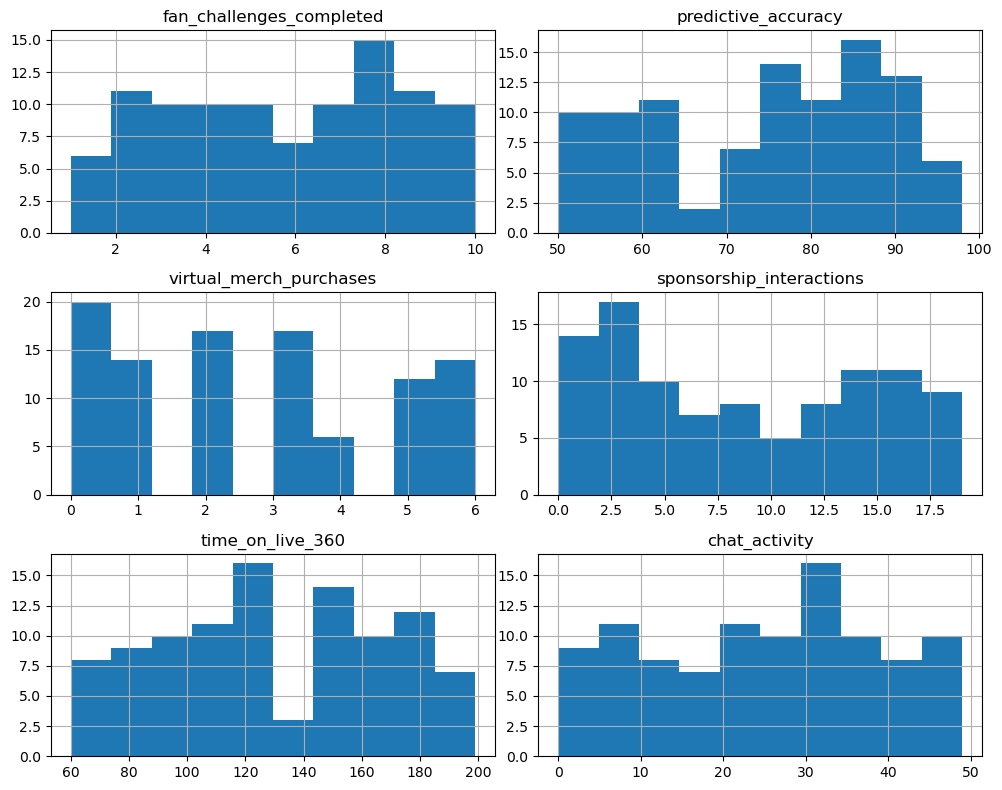

In [18]:
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Investigate trends

### which users are most likely to purchase virtual merhcandise? 
-  I will use a boxplot to demonstrate ho user activities vary across different purchace behavior to see if there are certain behaviors associated with more merchanide purchases. 
- I will use a scatter plot to see how stong these relationships are

Index(['user_id', 'fan_challenges_completed', 'predictive_accuracy',
       'virtual_merch_purchases', 'sponsorship_interactions',
       'time_on_live_360', 'chat_activity'],
      dtype='object')


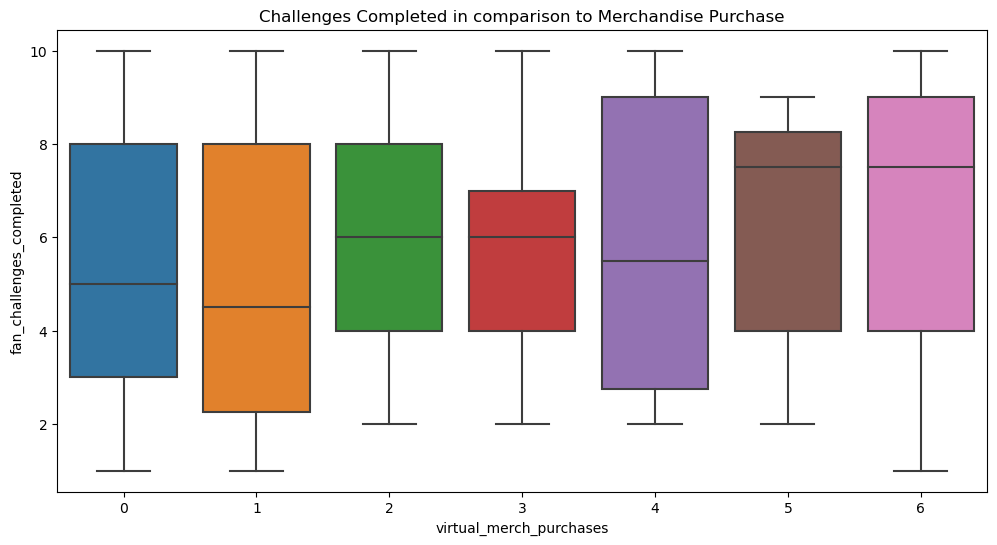

In [16]:
# boxplot
# debug print(data.columns)

plt.figure(figsize=(12, 6))
sns.boxplot(x='virtual_merch_purchases', y='fan_challenges_completed', data=data)
plt.title('Challenges Completed in comparison to Merchandise Purchase')
plt.show()



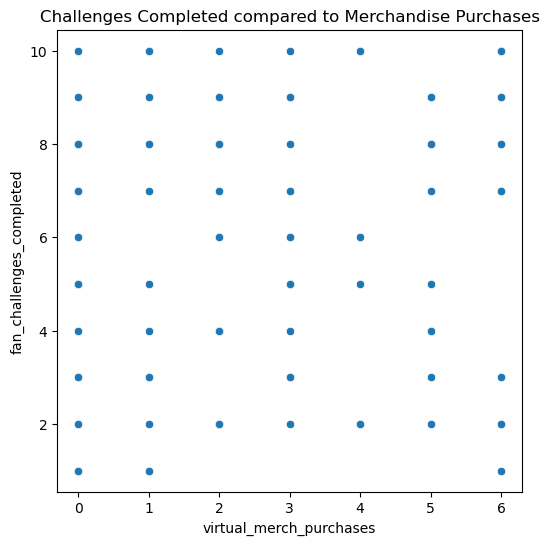

In [20]:
# Scatterplot
plt.figure(figsize=(6, 6))
sns.scatterplot(x='virtual_merch_purchases', y='fan_challenges_completed', data=data)
plt.title('Challenges Completed compared to Merchandise Purchases')
plt.show()


In [ ]:
# I will make a pie chart to understand the distribution of user activitis 

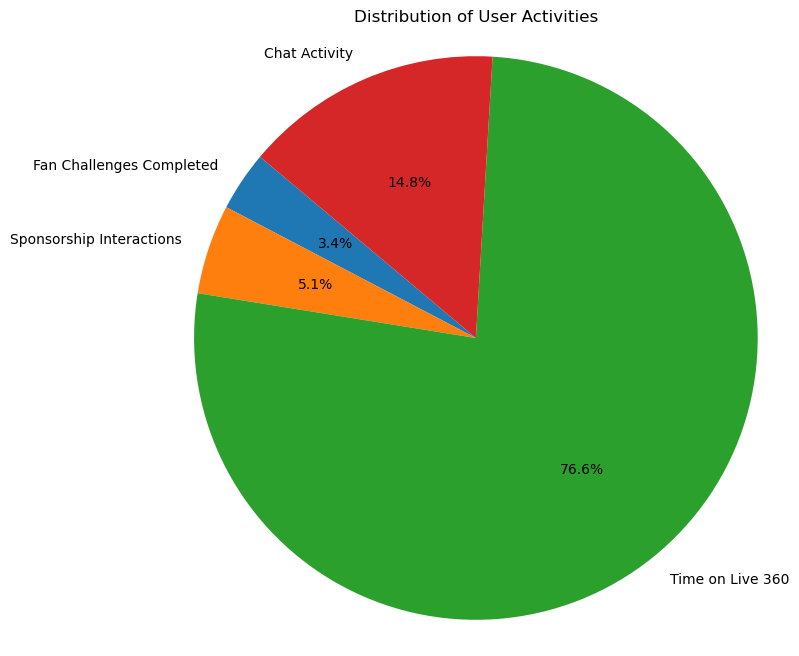

In [23]:
activity_sums = {
    'Fan Challenges Completed': data['fan_challenges_completed'].sum(),
    'Sponsorship Interactions': data['sponsorship_interactions'].sum(),
    'Time on Live 360': data['time_on_live_360'].sum(),
    'Chat Activity': data['chat_activity'].sum()
}

#pie chart
plt.figure(figsize=(8, 8))
plt.pie(activity_sums.values(), labels=activity_sums.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of User Activities')
plt.axis('equal')  
plt.show()

In [ ]:
# users seem to dedicate a majority of their activities on Live 360. 

In [21]:
# I will make a correlation matrix to see how user activity correlates with merch purchases. 

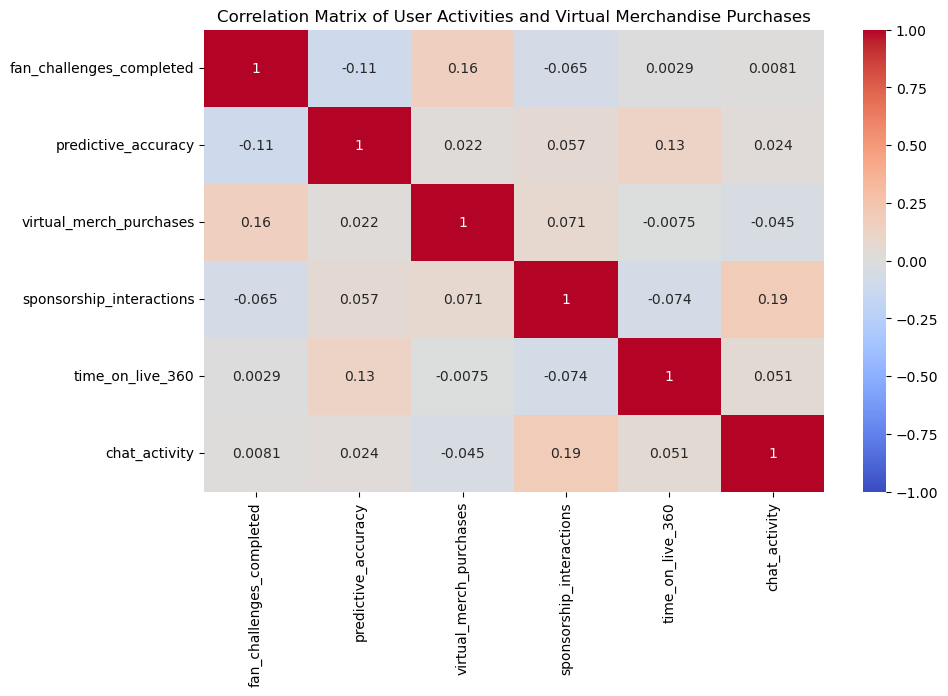

In [22]:
numeric_data = data.drop(columns=['user_id'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of User Activities and Virtual Merchandise Purchases')
plt.show()

### This correlation Matrix suggests a positive correlation with the purchase of merch
- this means that users who completed more fan challenges were more likely to purchase virtual merchandise, even if the relashionship is not super strong, it still exists.
### Sponsorships seems to have a weak correlation with merch purchase
- this means that users who click on ads or interact with sponsorship items have a weak positive correlation to buy cherch. 

## Propose a new fan challenge based on your analysis
- I would propose an acitivity that is mobile- based